In [0]:
!pip install geopandas

     |████████████████████████████████| 931kB 2.8MB/s 
     |████████████████████████████████| 10.9MB 46.2MB/s 
     |████████████████████████████████| 14.7MB 312kB/s 


In [0]:
!pip install ipywidgets

In [0]:
!pip install keplergl

     |████████████████████████████████| 7.0MB 2.7MB/s 
  Created wheel for keplergl: filename=keplergl-0.2.0-py2.py3-none-any.whl size=14022714 sha256=1162d8652b40178102980f6181154edbeb50d7efc7643294acfdf7e986934d4a
  Stored in directory: /root/.cache/pip/wheels/4f/84/fb/07e6ba9f84f379c0660f5d39d80ae39e1acd0ff0aa5396f10f
Successfully built keplergl


In [0]:
!pip install --upgrade jupyterthemes

     |████████████████████████████████| 7.0MB 2.7MB/s 
     |████████████████████████████████| 51kB 7.1MB/s 
     |████████████████████████████████| 9.7MB 29.4MB/s 
     |████████████████████████████████| 51kB 6.9MB/s 
     |████████████████████████████████| 501kB 48.1MB/s 
  Created wheel for tornado: filename=tornado-6.0.4-cp36-cp36m-linux_x86_64.whl size=427626 sha256=3e6ff600d726cccaffe04f8a6e06fecdd4c19cb0f40f36540df1d4635d924b2b
  Stored in directory: /root/.cache/pip/wheels/93/84/2f/409c7b2bb3afc3aa727f7ee8787975e0793f74d1165f4d0104
Successfully built tornado
ERROR: google-colab 1.0.0 has requirement notebook~=5.2.0, but you'll have notebook 6.0.3 which is incompatible.
  Found existing installation: tornado 4.5.3
    Uninstalling tornado-4.5.3:
      Successfully uninstalled tornado-4.5.3
  Found existing installation: notebook 5.2.2
    Uninstalling notebook-5.2.2:
      Successfully uninstalled notebook-5.2.2


In [0]:
!jupyter nbextension install --py --sys-prefix keplergl

Installing /usr/local/lib/python3.6/dist-packages/keplergl/static -> keplergl-jupyter
Making directory: /usr/share/jupyter/nbextensions/keplergl-jupyter/
Copying: /usr/local/lib/python3.6/dist-packages/keplergl/static/extension.js -> /usr/share/jupyter/nbextensions/keplergl-jupyter/extension.js
Copying: /usr/local/lib/python3.6/dist-packages/keplergl/static/keplergl.html -> /usr/share/jupyter/nbextensions/keplergl-jupyter/keplergl.html
Copying: /usr/local/lib/python3.6/dist-packages/keplergl/static/index.js -> /usr/share/jupyter/nbextensions/keplergl-jupyter/index.js
Copying: /usr/local/lib/python3.6/dist-packages/keplergl/static/extension.js.map -> /usr/share/jupyter/nbextensions/keplergl-jupyter/extension.js.map
Copying: /usr/local/lib/python3.6/dist-packages/keplergl/static/index.js.map -> /usr/share/jupyter/nbextensions/keplergl-jupyter/index.js.map
Copying: /usr/local/lib/python3.6/dist-packages/keplergl/static/main.js -> /usr/share/jupyter/nbextensions/keplergl-jupyter/main.js
- 

In [0]:
!jupyter nbextension enable --py keplergl

Enabling notebook extension keplergl-jupyter/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from google.colab import drive

In [0]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df_ts = pd.read_csv('https://datahub.io/core/covid-19/r/time-series-19-covid-combined.csv')

In [0]:
df_ts = pd.read_pickle('drive/My Drive/Hobby project/covid19/covid_TS_29th_May.pkl')

In [0]:
df_ts.head()

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
1,2020-01-23,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
2,2020-01-24,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
3,2020-01-25,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
4,2020-01-26,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0


In [0]:
date_wise = df_ts.groupby('Country/Region')['Date'].count()
date_wise

Country/Region
Afghanistan           127
Albania               127
Algeria               127
Andorra               127
Angola                127
                     ... 
West Bank and Gaza    127
Western Sahara        127
Yemen                 127
Zambia                127
Zimbabwe              127
Name: Date, Length: 188, dtype: int64

In [0]:
date_wise = date_wise.to_frame(name='total days').reset_index()

In [0]:
date_wise

,Country/Region,total days
0,Afghanistan,127
1,Albania,127
2,Algeria,127
3,Andorra,127
4,Angola,127
...,...,...
183,West Bank and Gaza,127
184,Western Sahara,127
185,Yemen,127
186,Zambia,127


In [0]:
# Replacing US with United States of America:
date_wise.replace('US', 'United States of America', inplace=True)
date_wise.replace('South, Korea', 'South Korea', inplace=True)
date_wise.replace('Western Sahara', 'W. Sahara', inplace=True)
date_wise.replace('Congo (Kinshasa)', 'Dem. Rep. Congo', inplace=True)
date_wise.replace('Taiwan*', 'Taiwan', inplace=True)
date_wise.replace('South Sudan', 'S. Sudan', inplace=True)
date_wise.replace('Equatorial Guinea', 'Eq. Guinea', inplace=True)
date_wise.replace('Congo (Brazzaville)', 'Congo', inplace=True)
date_wise.replace('Central African Republic', 'Central African Rep.', inplace=True)
date_wise.replace('Bosnia and Herzegovina', 'Bosnia and Herz.', inplace=True)
date_wise.replace('Dominican Republic', 'Dominican Rep.', inplace=True)
date_wise.replace('North Macedonia', 'Macedonia', inplace=True)

In [0]:
date_wise.head()

,Country/Region,total days
0,Afghanistan,127
1,Albania,127
2,Algeria,127
3,Andorra,127
4,Angola,127


**TODO: Aggregate data per day **

In [0]:
print('The records for different countries are collected for different number of dates, these varies as {} days.'.format([i for i in date_wise['total days'].unique()]))

The records for different countries are collected for different number of dates, these varies as [127, 1016, 1905, 4191, 381, 1397, 635] days.


In [0]:
date_dict = {}
for i in date_wise.unique():
  date_dict[str(i)] = date_wise[date_wise == i].index.to_list()

In [0]:
print('The total number of countries in the dataset with data collected for different number of days as shown above {}'.format(date_wise.groupby('total days')['Country/Region'].nunique().values))

The total number of countries in the dataset with data collected for different number of days as shown above [181   1   1   1   2   1   1]


In [0]:
date_gpd = gpd.GeoDataFrame(date_wise)

In [0]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [0]:
world['name'].nunique()

177

In [0]:
merged_df = date_wise.merge(world, left_on ='Country/Region', right_on='name', how='inner' )

In [0]:
merged_df

,Country/Region,total days,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,Afghanistan,127,34124811,Asia,Afghanistan,AFG,64080.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
1,Albania,127,3047987,Europe,Albania,ALB,33900.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
2,Algeria,127,40969443,Africa,Algeria,DZA,609400.0,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948..."
3,Angola,127,29310273,Africa,Angola,AGO,189000.0,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4..."
4,Argentina,127,44293293,South America,Argentina,ARG,879400.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."
...,...,...,...,...,...,...,...,...
155,Vietnam,127,96160163,Asia,Vietnam,VNM,594900.0,"POLYGON ((104.33433 10.48654, 105.19991 10.889..."
156,W. Sahara,127,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
157,Yemen,127,28036829,Asia,Yemen,YEM,73450.0,"POLYGON ((52.00001 19.00000, 52.78218 17.34974..."
158,Zambia,127,15972000,Africa,Zambia,ZMB,65170.0,"POLYGON ((30.74001 -8.34001, 31.15775 -8.59458..."


In [0]:
merged_df = merged_df[['Country/Region', 'geometry', 'total days']]

In [0]:
merged_df = gpd.GeoDataFrame(merged_df)

In [0]:
merged_df = pd.read_pickle('drive/My Drive/Hobby project/covid19/Covid19Geo.pkl')

In [0]:
unmerged_df = pd.merge(date_wise, world, left_on='Country/Region', right_on='name', how='outer')

In [0]:
unmerged_df

,Country/Region,total days,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,Afghanistan,127.0,34124811.0,Asia,Afghanistan,AFG,64080.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
1,Albania,127.0,3047987.0,Europe,Albania,ALB,33900.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
2,Algeria,127.0,40969443.0,Africa,Algeria,DZA,609400.0,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948..."
3,Andorra,127.0,NaN,NaN,NaN,NaN,NaN,None
4,Angola,127.0,29310273.0,Africa,Angola,AGO,189000.0,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4..."
...,...,...,...,...,...,...,...,...
210,NaN,NaN,265100.0,Asia,N. Cyprus,-99,3600.0,"POLYGON ((32.73178 35.14003, 32.80247 35.14550..."
211,NaN,NaN,3500000.0,Africa,Somaliland,-99,12250.0,"POLYGON ((48.94820 11.41062, 48.94820 11.41062..."
212,NaN,NaN,3856181.0,Europe,Bosnia and Herz.,BIH,42530.0,"POLYGON ((18.56000 42.65000, 17.67492 43.02856..."
213,NaN,NaN,2103721.0,Europe,Macedonia,MKD,29520.0,"POLYGON ((22.38053 42.32026, 22.88137 41.99930..."


In [0]:
world[world['name']=='United States of America']

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [0]:
unmerged_df[unmerged_df['name'].isnull()]

,Country/Region,total days,pop_est,continent,name,iso_a3,gdp_md_est,geometry
3,Andorra,127.0,NaN,NaN,NaN,NaN,NaN,None
5,Antigua and Barbuda,127.0,NaN,NaN,NaN,NaN,NaN,None
12,Bahrain,127.0,NaN,NaN,NaN,NaN,NaN,None
14,Barbados,127.0,NaN,NaN,NaN,NaN,NaN,None
21,Bosnia and Herzegovina,127.0,NaN,NaN,NaN,NaN,NaN,None
27,Burma,127.0,NaN,NaN,NaN,NaN,NaN,None
29,Cabo Verde,127.0,NaN,NaN,NaN,NaN,NaN,None
33,Central African Republic,127.0,NaN,NaN,NaN,NaN,NaN,None
38,Comoros,127.0,NaN,NaN,NaN,NaN,NaN,None
39,Congo (Brazzaville),127.0,NaN,NaN,NaN,NaN,NaN,None


In [0]:
unmerged = pd.merge(world, date_wise, right_on='Country/Region', left_on='name', how='outer')

In [0]:
unmerged.name

0                          Fiji
1                      Tanzania
2                     W. Sahara
3                        Canada
4      United States of America
                 ...           
210                         NaN
211                         NaN
212                         NaN
213                         NaN
214                         NaN
Name: name, Length: 215, dtype: object

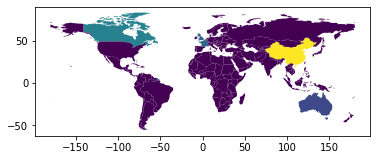

In [0]:
#fig, ax = plt.subplots(1,1)
#plt.figure(figsize=(10,10))
merged_df.plot(column ='total days')
#plt.savefig('drive/My Drive/Hobby project/covid19/temp3.jpeg', dpi=100)

In [0]:
merged_df

,Country/Region,geometry,total days
0,Afghanistan,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",127
1,Albania,"POLYGON ((21.02004 40.84273, 20.99999 40.58000...",127
2,Algeria,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948...",127
3,Angola,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4...",127
4,Argentina,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...",127
...,...,...,...
155,Vietnam,"POLYGON ((104.33433 10.48654, 105.19991 10.889...",127
156,W. Sahara,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",127
157,Yemen,"POLYGON ((52.00001 19.00000, 52.78218 17.34974...",127
158,Zambia,"POLYGON ((30.74001 -8.34001, 31.15775 -8.59458...",127


In [0]:
from keplergl import KeplerGl
import keplergl

In [0]:
%run config_2D.py
config_2D = config

ERROR:root:File `'config_2D.py'` not found.


NameError: ignored

In [0]:
map1 = KeplerGl(height=500)
map1

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(height=500)